# Preliminary Visualizations

This notebook contains some preliminary visualizations.  The data is pre-processed for machine learning in the appendices.

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import sklearn.preprocessing

import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

### First pre-process the data (justification is in the appendices)

In [3]:
alldata=pd.read_csv('./data/Ames_HousePrice.csv', index_col=0)

In [4]:
#Filling in missing values (see work below for exploration of  missing features)
#This cell is here for easy reload
alldata['PoolQC']=np.where(alldata.PoolQC.isna(), None, alldata.PoolQC)

alldata['MiscFeature']=np.where(alldata.MiscFeature.isna(), None, alldata.MiscFeature)


alldata['Electrical']=np.where(alldata.Electrical.isna(), 'SBrkr', alldata.Electrical)

alldata['MasVnrType']=np.where(alldata.MasVnrType.isna(), None, alldata.MasVnrType)

alldata['MasVnrArea']=np.where(alldata.MasVnrArea.isna(), 0, alldata.MasVnrArea)




alldata['Alley']=np.where(alldata.Alley.isna(), None, alldata.Alley)

alldata['Fence']=np.where(alldata.Fence.isna(), None, alldata.Fence)

alldata['FireplaceQu']=np.where(alldata.FireplaceQu.isna(), None, alldata.FireplaceQu) #FireplaceQu:fireplace quality



#Replace year garage was built with year house was built. The feature of not having a garage will need to be picked up by categorical garage variables
#Can consider replacing it with 0 to increase the effect of having no garage, but may produce outliers this way
alldata['GarageYrBlt']=np.where(alldata.GarageYrBlt.isna(), alldata.YearBuilt, alldata.GarageYrBlt) #FireplaceQu:fireplace quality

for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
    alldata[col]=np.where(alldata[col].isna(), None, alldata[col]) 
    

for col in ['GarageArea', 'GarageCars']:
    alldata[col]=np.where(alldata[col].isna(), 0, alldata[col]) 

for col in ['BsmtFinType2', 'BsmtExposure', 'BsmtQual', 'BsmtCond','BsmtFinType1']:
    alldata[col]=np.where(alldata[col].isna(), None, alldata[col]) 
    
for col in ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF']:
    alldata[col]=np.where(alldata[col].isna(), 0, alldata[col])    

def fillna_linear_reg(lin_reg, frontage, area):
    area_ = area.loc(frontage.isna())
    pred_frontage = lin_reg.predict(area)
    frontage.loc[nan_mask] = pred_frontage
    
    
#The transformation below is only applied to the training set
from sklearn.linear_model import LinearRegression    
def fillna_linear_reg(X,y,data,mask=None):
    """Fill in the values in one dependent variable based on linear regression off another one"""
    df_=data[mask]
    df_na= data[~mask]
    lin_reg=LinearRegression().fit(df_[[X]],df_[[y]])
    preds=lin_reg.predict(df_na[[X]])
    data.loc[~mask,y]=np.squeeze(preds)
    
fillna_linear_reg('LotArea','LotFrontage',alldata,mask=alldata['LotFrontage'].notnull())

#Drop the id column as it is unique for each data point and hence is not useful for prediction
alldata.drop(['PID'], axis=1, inplace=True)


#Some columns only have missing values in the test set.  These are treated below.

#This feature imputation is inspired by https://www.kaggle.com/code/lavanyashukla01/how-i-made-top-0-3-on-a-kaggle-competition
alldata['MSZoning'] = alldata.groupby('MSSubClass')['MSZoning'].transform(lambda x: x.fillna(x.mode()[0]))

alldata['Utilities']=np.where(alldata.Utilities.isna(), 'AllPub', alldata.Utilities)

alldata['Functional']=np.where(alldata.Functional.isna(), 'Typ', alldata.Functional)

alldata['Exterior1st']=np.where(alldata.Exterior1st.isna(), alldata['Exterior1st'].mode()[0], alldata.Exterior1st)
alldata['Exterior2nd']=np.where(alldata.Exterior2nd.isna(), alldata['Exterior2nd'].mode()[0], alldata.Exterior2nd)

for col in ['BsmtFullBath', 'BsmtHalfBath']:
    alldata[col]=np.where(alldata[col].isna(), 0, alldata[col])  
    
alldata['KitchenQual']=np.where(alldata.KitchenQual.isna(), alldata['KitchenQual'].mode()[0], alldata.KitchenQual)
alldata['SaleType']=np.where(alldata.SaleType.isna(), alldata['SaleType'].mode()[0], alldata.SaleType)



In [5]:
alldata.head()

,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1,856,126000,30,RL,65.681729,7890,Pave,None,Reg,Lvl,AllPub,Corner,Gtl,SWISU,Norm,Norm,1Fam,1Story,6,6,1939,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,238.0,Unf,0.0,618.0,856.0,GasA,TA,Y,SBrkr,856,0,0,1.0,0.0,1,0,2,1,TA,4,Typ,1,Gd,Detchd,1939.0,Unf,2.0,399.0,TA,TA,Y,0,0,0,0,166,0,None,None,None,0,3,2010,WD,Normal
2,1049,139500,120,RL,42.000000,4235,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,1Story,5,5,1984,1984,Gable,CompShg,HdBoard,HdBoard,BrkFace,149.0,Gd,TA,CBlock,Gd,TA,Mn,GLQ,552.0,ALQ,393.0,104.0,1049.0,GasA,TA,Y,SBrkr,1049,0,0,1.0,0.0,2,0,2,1,Gd,5,Typ,0,None,Attchd,1984.0,Fin,1.0,266.0,TA,TA,Y,0,105,0,0,0,0,None,None,None,0,2,2009,WD,Normal
3,1001,124900,30,C (all),60.000000,6060,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,5,9,1930,2007,Hip,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,BrkTil,TA,TA,No,ALQ,737.0,Unf,0.0,100.0,837.0,GasA,Ex,Y,SBrkr,1001,0,0,0.0,0.0,1,0,2,1,Gd,5,Typ,0,None,Detchd,1930.0,Unf,1.0,216.0,TA,Po,N,154,0,42,86,0,0,None,None,None,0,11,2007,WD,Normal
4,1039,114000,70,RL,80.000000,8146,Pave,None,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,2Story,4,8,1900,2003,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,Gd,BrkTil,Fa,TA,No,Unf,0.0,Unf,0.0,405.0,405.0,GasA,Gd,Y,SBrkr,717,322,0,0.0,0.0,1,0,2,1,TA,6,Typ,0,None,Detchd,1940.0,Unf,1.0,281.0,TA,TA,N,0,0,168,0,111,0,None,None,None,0,5,2009,WD,Normal
5,1665,227000,60,RL,70.000000,8400,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,2Story,8,6,2001,2001,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,643.0,Unf,0.0,167.0,810.0,GasA,Ex,Y,SBrkr,810,855,0,1.0,0.0,2,1,3,1,Gd,6,Typ,0,None,Attchd,2001.0,Fin,2.0,528.0,TA,TA,Y,0,45,0,0,0,0,None,None,None,0,11,2009,WD,Normal


## Inspect the distributions of key numeric variables

In [6]:
large_numerics=['GrLivArea','TotalBsmtSF','BsmtFinSF1','1stFlrSF']
small_numerics=['BsmtFullBath','OverallCond','HalfBath','KitchenAbvGr','BsmtHalfBath','FullBath','Fireplaces','GarageCars','OverallQual','MoSold','TotRmsAbvGrd']

Text(0.5, 1.0, 'Year Built')

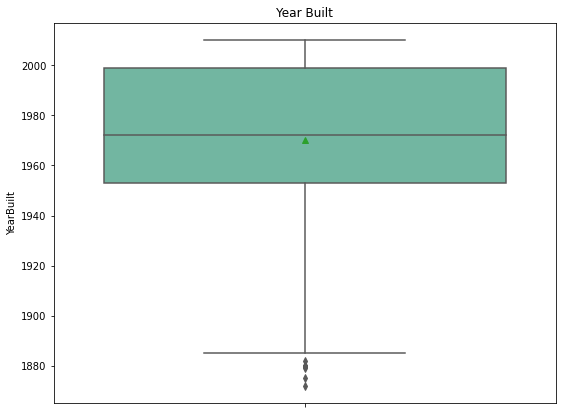

In [7]:
plt.figure(figsize=(9,7))
ax = sns.boxplot(data=alldata['YearBuilt'], y=alldata['YearBuilt'],orient="h", palette="Set2",
                showmeans=True)
plt.title("Year Built") 

Text(0.5, 1.0, 'Square Footage Columns')

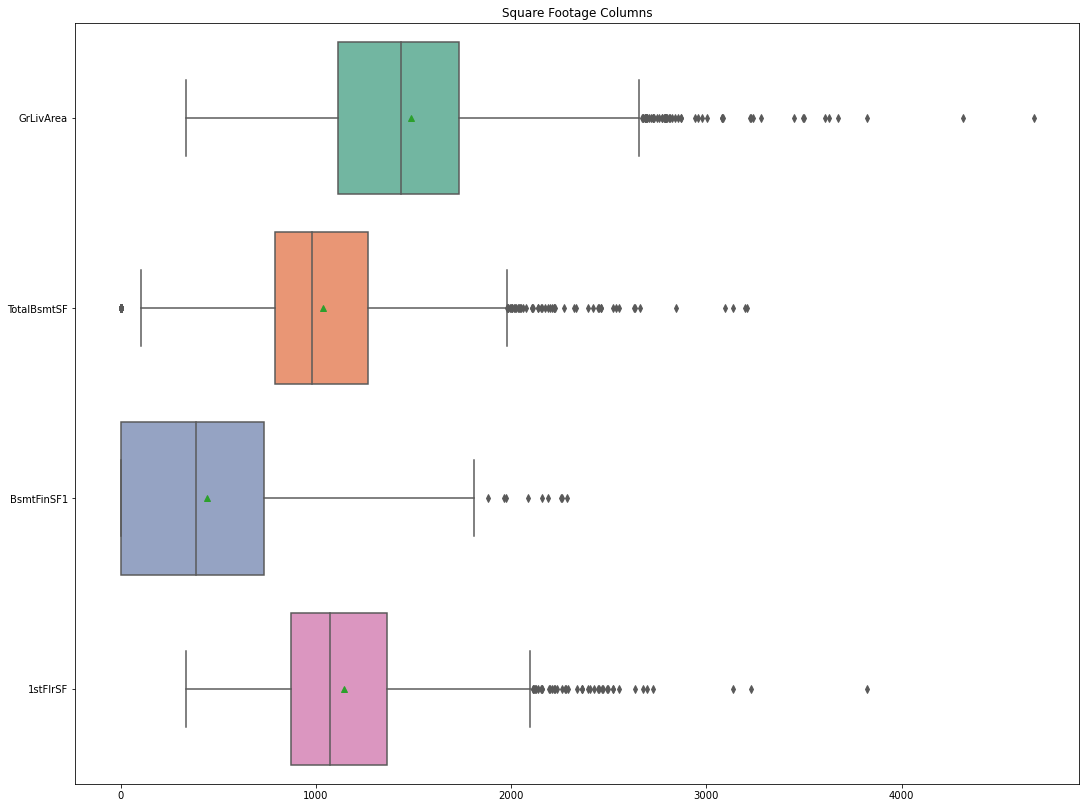

In [8]:
plt.figure(figsize=(18,14))
ax = sns.boxplot(data=alldata[large_numerics],orient="h", palette="Set2",
                showmeans=True)
plt.title("Square Footage Columns") 

Text(0.5, 1.0, 'Small Numeric Columns')

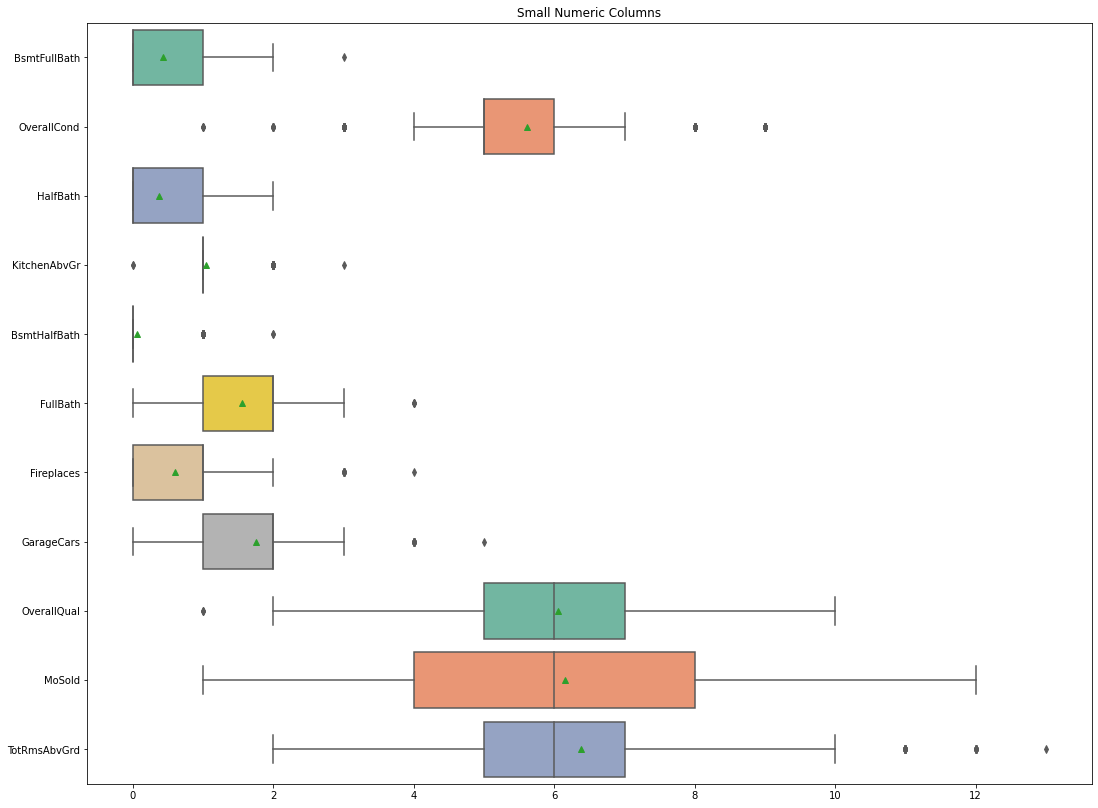

In [9]:
plt.figure(figsize=(18,14))
ax = sns.boxplot(data=alldata[small_numerics], orient="h", palette="Set2",
                showmeans=True)
plt.title("Small Numeric Columns") 

## Inspect the distribution of the dependent variable (SalePrice)

<AxesSubplot:>

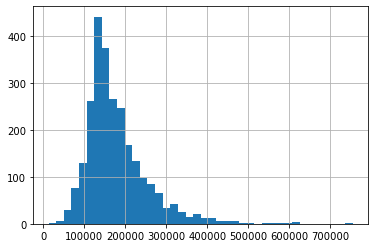

In [10]:
alldata.SalePrice.hist(bins=40)

It appears to be skewed to the right, with some exceptinally high prices in the mix.

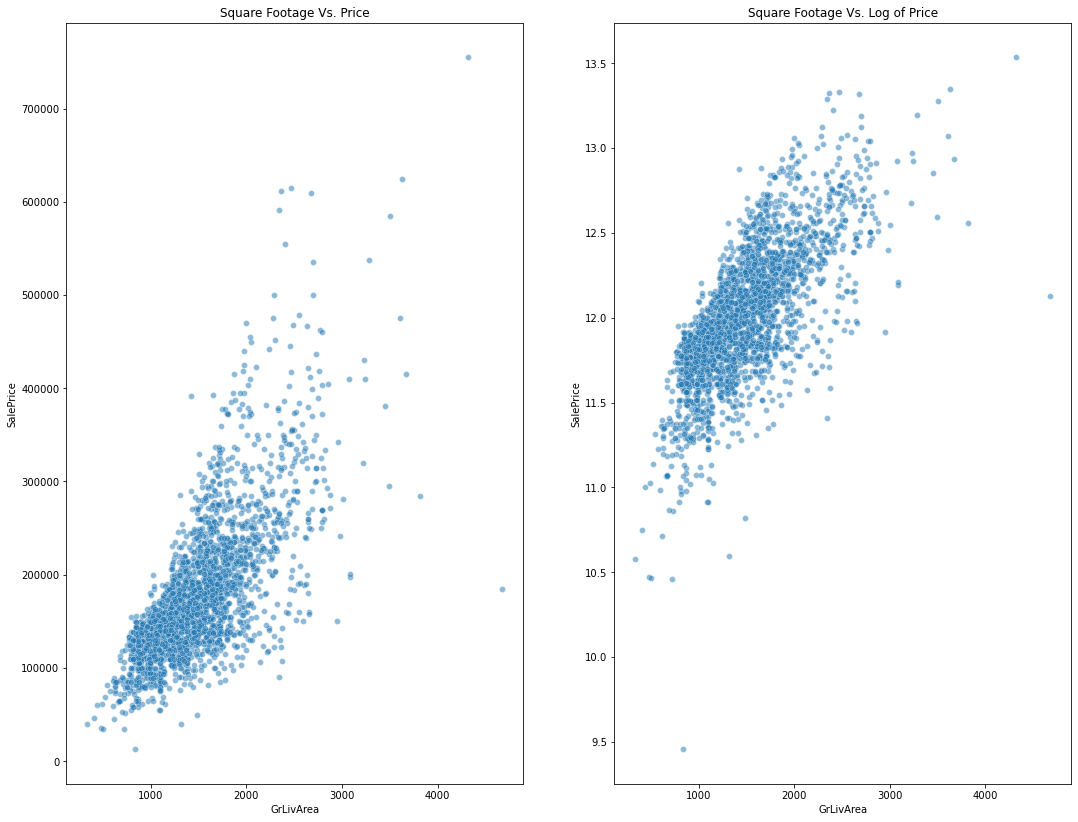

In [11]:
fig,(ax0,ax1) = plt.subplots(nrows=1, ncols=2,figsize=(18,14))
palette=sns.color_palette("Set2", as_cmap=True)
plot0 = sns.scatterplot(data = alldata,x=alldata["GrLivArea"], y=alldata["SalePrice"],alpha=.5,palette=palette,ax=ax0)
plot1 = sns.scatterplot(data = alldata,x=alldata["GrLivArea"], y=np.log1p(alldata["SalePrice"]),alpha=.5,palette=palette,ax=ax1)

plot0.set_title("Square Footage Vs. Price")
plot1.set_title("Square Footage Vs. Log of Price")

plt.show()

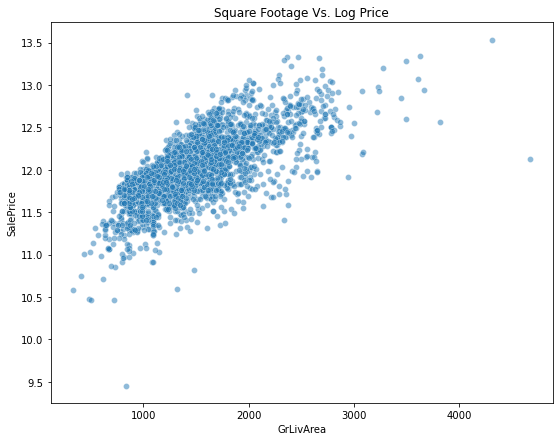

In [12]:
plt.figure(figsize=(9, 7))
palette=sns.color_palette("Set2", as_cmap=True)
plot = sns.scatterplot(data = alldata,x=alldata["GrLivArea"], y=np.log1p(alldata["SalePrice"]),alpha=.5,palette=palette)

plot.set_title("Square Footage Vs. Log Price")
plt.show()

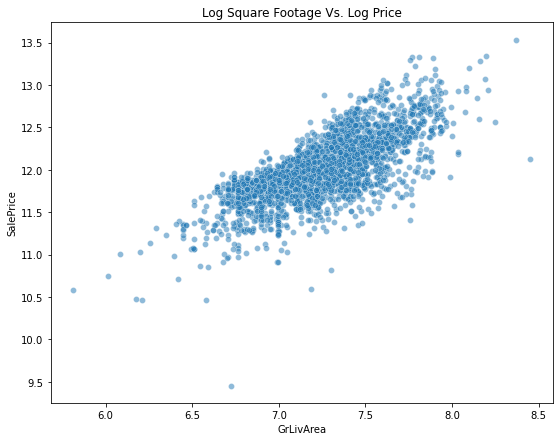

In [13]:
plt.figure(figsize=(9, 7))
palette=sns.color_palette("Set2", as_cmap=True)
plot = sns.scatterplot(data = alldata,x=np.log1p(alldata["GrLivArea"]), y=np.log1p(alldata["SalePrice"]),alpha=.5,palette=palette)

plot.set_title("Log Square Footage Vs. Log Price")
plt.show()

In [14]:
alldata['SalePrice'].mean()

178059.62325581396

The prices 'fan out' as houses get larger, with some larger houses being relatively inexpensive. This can probably be attributed to the well-known fact that smaller houses are more expensive by area.  To satisfy the assumption of a linear relationship, it would be crucial to log-tranform the sale price, the square feet variables, or both.

In [14]:
alldata['LogPrice']=np.log1p(alldata["SalePrice"])

In [15]:
alldata[['LogPrice','Neighborhood']].sort_values(by=['LogPrice'],ascending=False)

,LogPrice,Neighborhood
8,13.534474,NoRidge
326,13.345509,NoRidge
66,13.329379,NridgHt
585,13.323929,NridgHt
640,13.321216,NridgHt
...,...,...
918,10.579005,BrkSide
645,10.471978,IDOTRR
336,10.463132,Edwards
559,10.460271,IDOTRR


In [16]:
df=pd.DataFrame()

In [17]:
df['LogPrice']=(alldata[['LogPrice','Neighborhood']].
 groupby(['Neighborhood']).
 agg({'LogPrice':['median']}))['LogPrice']['median']
 #.
 #sort_values(by=['LogPrice'],ascending=False))

In [18]:
df['LogPrice']=df['LogPrice'].apply(pd.to_numeric)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28 entries, Blmngtn to Veenker
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LogPrice  28 non-null     float64
dtypes: float64(1)
memory usage: 448.0+ bytes


In [20]:
df=df.sort_values(by=['LogPrice'],ascending=True)

In [21]:
order_=list(df.index)

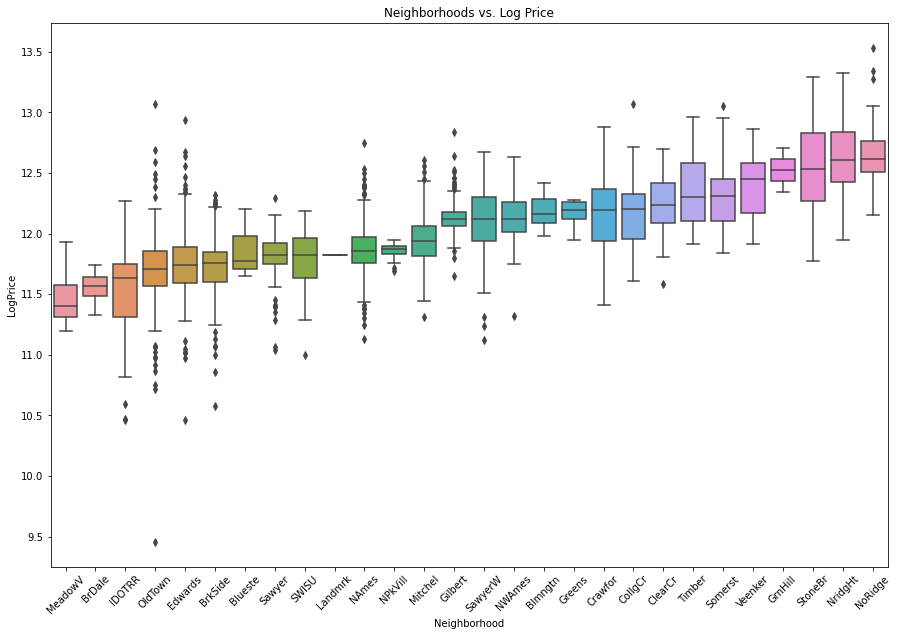

In [22]:
plt.figure(figsize=(15, 10))
palette=sns.color_palette("rocket", as_cmap=True)

plot=sns.boxplot(x="Neighborhood", y="LogPrice",
            data=alldata,orient='v',order=order_)
#plot.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.setp(plot.get_xticklabels(), rotation=45)


plot.set_title("Neighborhoods vs. Log Price")
plt.show()
